In [22]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
#Loading the dataset
df1 = pd.read_csv("train_features_normalized.csv")
X_small = np.array(df1.iloc[:, :].values,  dtype=float)[::12]
df = pd.DataFrame(X_small, columns = df1.columns)

Y = pd.read_csv("train_labels.csv")
# Y = np.array(labels_df.iloc[:, :].values,  dtype=float)

print(df.shape)
print(Y.shape)

for label in ['LABEL_BaseExcess', 'LABEL_Fibrinogen', 'LABEL_AST', 'LABEL_Alkalinephos', 'LABEL_Bilirubin_total', 'LABEL_Lactate', 'LABEL_TroponinI', 'LABEL_SaO2', 'LABEL_Bilirubin_direct', 'LABEL_EtCO2', 'LABEL_RRate', 'LABEL_ABPm', 'LABEL_SpO2', 'LABEL_Heartrate']:
    df[label] = Y[label]
    X = df.drop(label,1)   #Feature Matrix
    y = df[label]          #Target Variable
    cor = df.corr()
    #Correlation with output variable
    cor_target = abs(cor[label])
    #Selecting highly correlated features
    relevant_features = cor_target[cor_target>0.1]
    print(relevant_features)
    print("\n ")

# df["sepsis"] = Y2

# df.head()
# print(df.shape)

(18995, 37)
(18995, 16)
Time                0.121757
RRate               0.100146
SaO2                0.142184
ABPm                0.141643
ABPd                0.159434
ABPs                0.110622
LABEL_BaseExcess    1.000000
Name: LABEL_BaseExcess, dtype: float64

 
Lactate             0.122319
AST                 0.142717
Platelets           0.119874
Bilirubin_total     0.122042
LABEL_BaseExcess    0.144796
LABEL_Fibrinogen    1.000000
Name: LABEL_Fibrinogen, dtype: float64

 
BUN                 0.106542
RRate               0.107668
Heartrate           0.118992
Bilirubin_total     0.127323
LABEL_Fibrinogen    0.200269
LABEL_AST           1.000000
Name: LABEL_AST, dtype: float64

 
BUN                   0.104034
RRate                 0.108158
AST                   0.103091
Heartrate             0.119390
Bilirubin_total       0.128158
LABEL_Fibrinogen      0.203160
LABEL_AST             0.983645
LABEL_Alkalinephos    1.000000
Name: LABEL_Alkalinephos, dtype: float64

 
BUN           

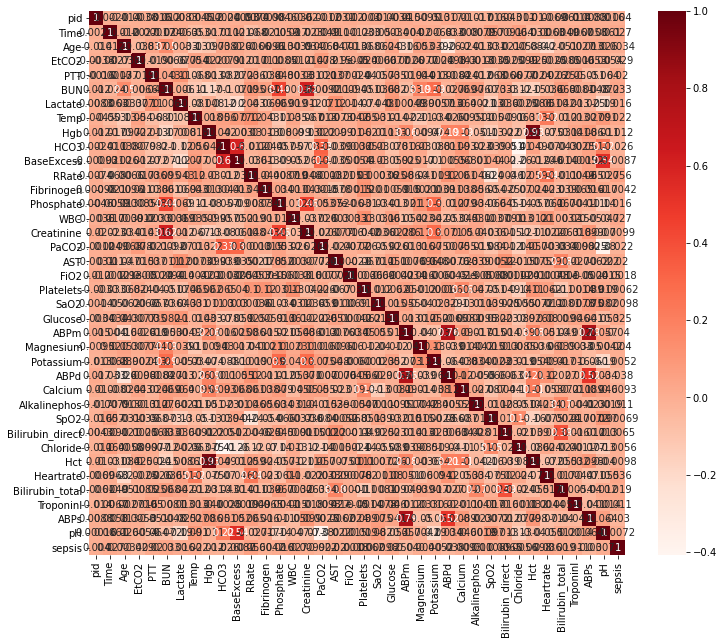

In [9]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
#Correlation with output variable
cor_target = abs(cor["sepsis"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.01]
relevant_features

Time               0.026887
EtCO2              0.029264
PTT                0.019571
BUN                0.033050
Lactate            0.016142
Temp               0.021978
Hgb                0.011854
HCO3               0.026264
RRate              0.055598
Phosphate          0.015978
WBC                0.027482
PaCO2              0.021568
AST                0.020058
Glucose            0.024851
ABPm               0.040120
ABPd               0.038032
Alkalinephos       0.010868
Heartrate          0.036123
Bilirubin_total    0.018574
TroponinI          0.011425
ABPs               0.029871
sepsis             1.000000
Name: sepsis, dtype: float64